In [1]:
#importing libraries
#pandas and numpy for data manipulation
import numpy as np
import pandas as pd

#matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
#sns.set(font_scale = 2)


#importing warnings to ignore warnings
import warnings
warnings.filterwarnings('ignore')


#importing stats from scipy
from scipy import stats

#Displaying all columns
pd.set_option('display.max_columns',None)

In [2]:
#loading training data file
train_data=pd.read_excel(r'C:\Users\Csp\Downloads\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Data_Train.xlsx')

#display top of dataset
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
#loading testing data file
test_data=pd.read_excel(r'C:\Users\Csp\Downloads\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Test_set.xlsx')

#display top of dataset
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
### Merging both train and test file to a single one using pd.concat, perform feature engineering 
###and then again dividing them later

## Creating a new Dataframe 'data ' with an extra variable 'root' specifying where each observation belong

train_data['root']='train'
test_data['root']= 'test'

#merging both train and test

data=pd.concat([train_data,test_data],ignore_index=True, sort=False)

#displaying top of dataset
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,root
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train


In [5]:
print('Train Data has ', train_data.shape[0], 'rows and ', train_data.shape[1], 'columns\n')
print('Test Data has ', test_data.shape[0], 'rows and ', test_data.shape[1], 'columns\n')
print('Concated Data has ', data.shape[0], 'rows and ', data.shape[1], 'columns\n')

Train Data has  10683 rows and  12 columns

Test Data has  2671 rows and  11 columns

Concated Data has  13354 rows and  12 columns



In [6]:
print('\nData Types of data set attributes---->')
data.dtypes


Data Types of data set attributes---->


Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
root                object
dtype: object

In [7]:
## So converting 'Date_of_Journey' datatype from object type to date
#Pre-processing
data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])
data['Month']=data['Date_of_Journey'].apply(lambda x:x.month)
data['Day']=data['Date_of_Journey'].apply(lambda x:x.day)
data['Year']=data['Date_of_Journey'].apply(lambda x:x.year)

#Dropping 'Date_of_Journey'
data.drop('Date_of_Journey',inplace=True,axis=1)

#Dropping attribute year as whole data is taken for year 2019
data.drop('Year',inplace=True,axis=1)

In [8]:
#converting 'Arrival_Time' datatype from object type to date
data['Arrival_Time']=pd.to_datetime(data['Arrival_Time'])
data['Arrival_Hour']=data['Arrival_Time'].dt.hour
data['Arrival_min']=data['Arrival_Time'].dt.minute

# Dropping 'Arrival_Time'
data.drop('Arrival_Time',inplace=True,axis=1)

In [9]:
#converting 'Dep_Time' datatype from object type to date
data['Dep_Time']=pd.to_datetime(data['Dep_Time'])
data['Dep_Hour']=data['Dep_Time'].dt.hour
data['Dep_min']=data['Dep_Time'].dt.minute

# Dropping 'Dep_Time'
data.drop('Dep_Time',inplace=True,axis=1)

In [10]:
#Converting attribute 'Duration' to  minutes
data['Duration']=data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [11]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,root,Month,Day,Arrival_Hour,Arrival_min,Dep_Hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897.0,train,3,24,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662.0,train,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882.0,train,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218.0,train,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302.0,train,1,3,21,35,16,50


In [12]:
## Checking for null values in dataset
data.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
root                  0
Month                 0
Day                   0
Arrival_Hour          0
Arrival_min           0
Dep_Hour              0
Dep_min               0
dtype: int64

<AxesSubplot:xlabel='Price', ylabel='Density'>

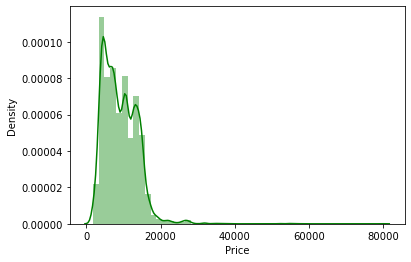

In [13]:
# Checking for distribution of atrribute Price
sns.distplot(data['Price'],color='g')

In [14]:
#replacing null values for Price with median
data['Price']=data['Price'].fillna(data['Price'].median())

#replacing null values for Route with mode
data['Route']=data['Route'].fillna(data['Route'].mode()[0])

#replacing null values for Total_Stops with mode
data['Total_Stops']=data['Total_Stops'].fillna(data['Total_Stops'].mode()[0])

In [15]:
#Checking for null values after filling null values

print('Missing values after filling null values--->')
data.isnull().sum()

Missing values after filling null values--->


Airline            0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
root               0
Month              0
Day                0
Arrival_Hour       0
Arrival_min        0
Dep_Hour           0
Dep_min            0
dtype: int64

In [16]:
#Checking for duplicate data
data.duplicated().sum()

248

In [17]:
#Dataset has many duplicated items(Around 246 rows)
data[data.duplicated()==True]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,root,Month,Day,Arrival_Hour,Arrival_min,Dep_Hour,Dep_min
683,Jet Airways,Delhi,Cochin,DEL → NAG → BOM → COK,830,2 stops,No info,13376.0,train,1,6,4,25,14,35
1061,Air India,Delhi,Cochin,DEL → GOI → BOM → COK,1275,2 stops,No info,10231.0,train,5,21,19,15,22,0
1348,Air India,Delhi,Cochin,DEL → HYD → BOM → COK,1560,2 stops,No info,12392.0,train,5,18,19,15,17,15
1418,Jet Airways,Delhi,Cochin,DEL → JAI → BOM → COK,1375,2 stops,In-flight meal not included,10368.0,train,6,6,4,25,5,30
1674,IndiGo,Banglore,New Delhi,BLR → DEL,175,non-stop,No info,7303.0,train,3,24,21,20,18,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13219,Air India,Delhi,Cochin,DEL → GOI → BOM → COK,1275,2 stops,No info,8372.0,test,3,6,19,15,22,0
13236,Jet Airways,Delhi,Cochin,DEL → JAI → BOM → COK,810,2 stops,No info,8372.0,test,6,15,19,0,5,30
13243,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,750,1 stop,No info,8372.0,test,3,6,1,30,13,0
13265,Air India,Kolkata,Banglore,CCU → BOM → GOI → BLR,765,2 stops,No info,8372.0,test,12,5,5,35,16,50


In [18]:
#Dropping duplicated rows
data.drop_duplicates(keep='first',inplace=True)

In [19]:
print('Shape of dataset after removing duplicates---->')
print('Data has ', data.shape[0], 'rows and ', data.shape[1], 'columns\n')

Shape of dataset after removing duplicates---->
Data has  13106 rows and  15 columns



In [20]:
## Checking for unique values of each attributes:

print('No. of Unique values in each attribute------')
data.apply(lambda x: len(x.unique()))

No. of Unique values in each attribute------


Airline              12
Source                5
Destination           6
Route               132
Duration            374
Total_Stops           5
Additional_Info      10
Price              1870
root                  2
Month                 7
Day                   9
Arrival_Hour         24
Arrival_min          12
Dep_Hour             24
Dep_min              12
dtype: int64

In [21]:
#Checking for data types after pre pricessing of data
print('data types after preprocessing of data--->')
data.dtypes

data types after preprocessing of data--->


Airline             object
Source              object
Destination         object
Route               object
Duration             int64
Total_Stops         object
Additional_Info     object
Price              float64
root                object
Month                int64
Day                  int64
Arrival_Hour         int64
Arrival_min          int64
Dep_Hour             int64
Dep_min              int64
dtype: object

In [22]:
catagorical_data=['Airline','Source','Destination','Total_Stops','Additional_Info','Month','Day']
for attribute in catagorical_data:
    print('-----------',attribute,'---------')
    print(data[attribute].value_counts(),end='\n')
    print('\n')

----------- Airline ---------
Jet Airways                          4586
IndiGo                               2552
Air India                            2127
Multiple carriers                    1539
SpiceJet                             1023
Vistara                               606
Air Asia                              404
GoAir                                 239
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64


----------- Source ---------
Delhi       5473
Kolkata     3567
Banglore    2727
Mumbai       883
Chennai      456
Name: Source, dtype: int64


----------- Destination ---------
Cochin       5473
Banglore     3567
Delhi        1582
New Delhi    1145
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64


----------- Total_Stops ---------
1 stop      7053
non-stop    4319
2 stops     1678
3 stops       54
4 stops        

In [23]:
#replacing  values in Destination
data['Destination']=data['Destination'].replace('New Delhi','Delhi')

#replacing mis interpretd values in Additional Info
data['Additional_Info']=data['Additional_Info'].replace('No Info','No info')

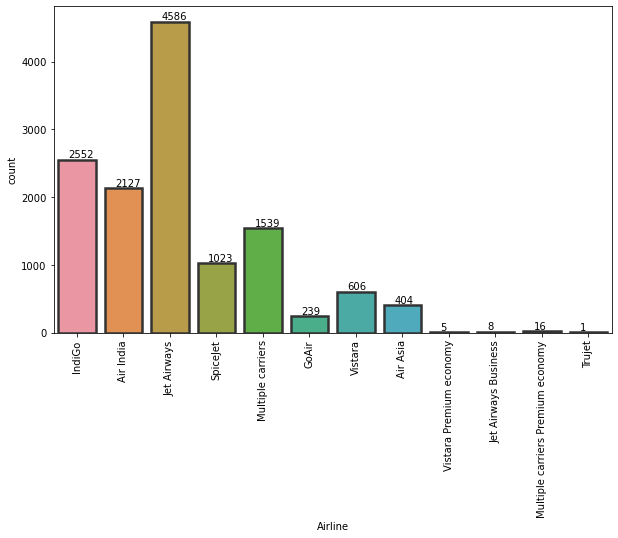

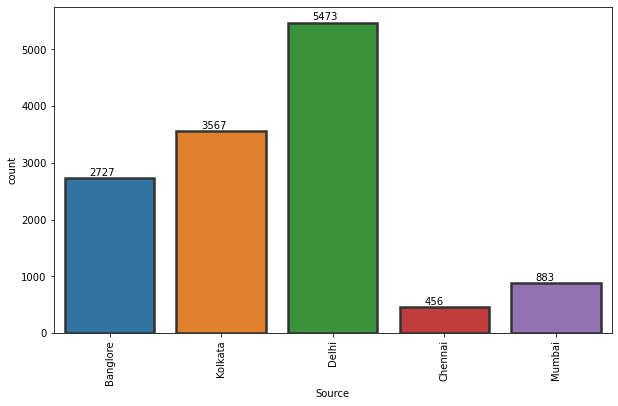

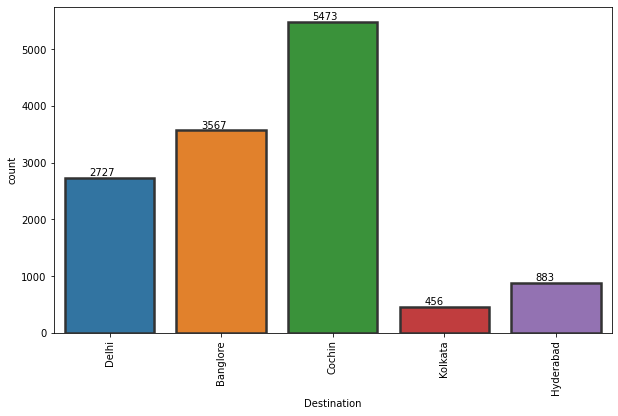

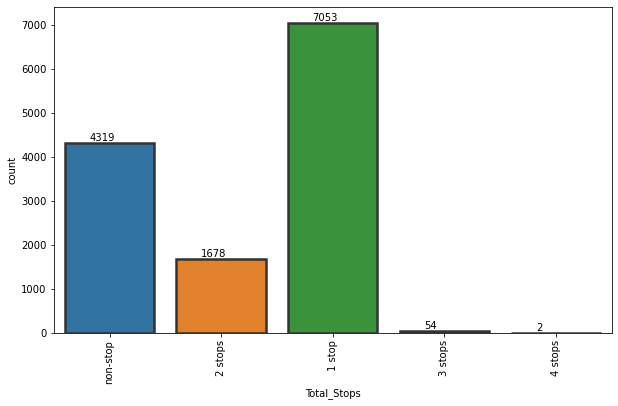

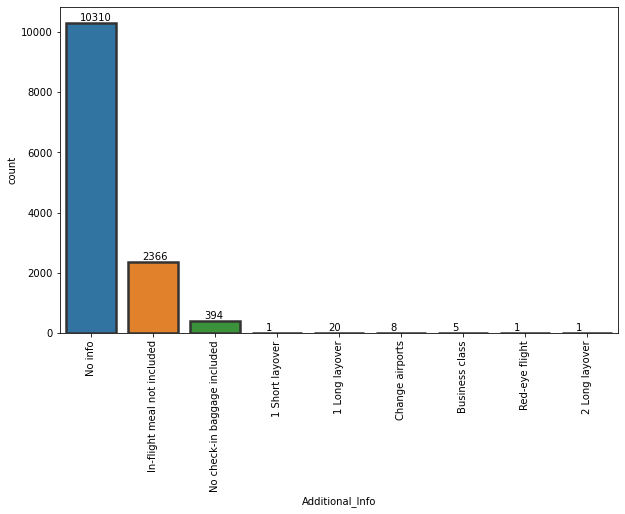

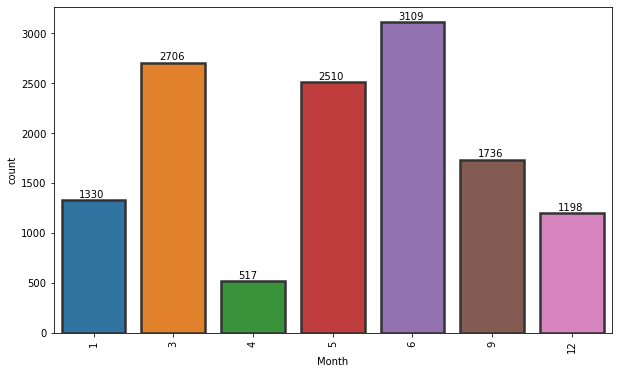

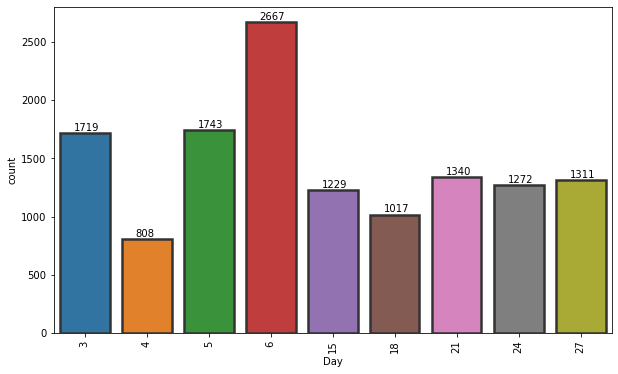

In [24]:
## Visulaization of catagorical data:
catagorical_data=['Airline','Source','Destination','Total_Stops','Additional_Info','Month','Day']

for i in catagorical_data:
    plt.figure(figsize=(10,6))
    ax=sns.countplot(data[i],edgecolor=".2",linewidth=2.5)
    plt.xticks(rotation=90)
    for j in ax.patches:
        ax.annotate(int(j.get_height()),(j.get_x()+0.22,j.get_height()+5), va='bottom',color='black')
    plt.show() 


Comparative analysis of Price with Airlines--->



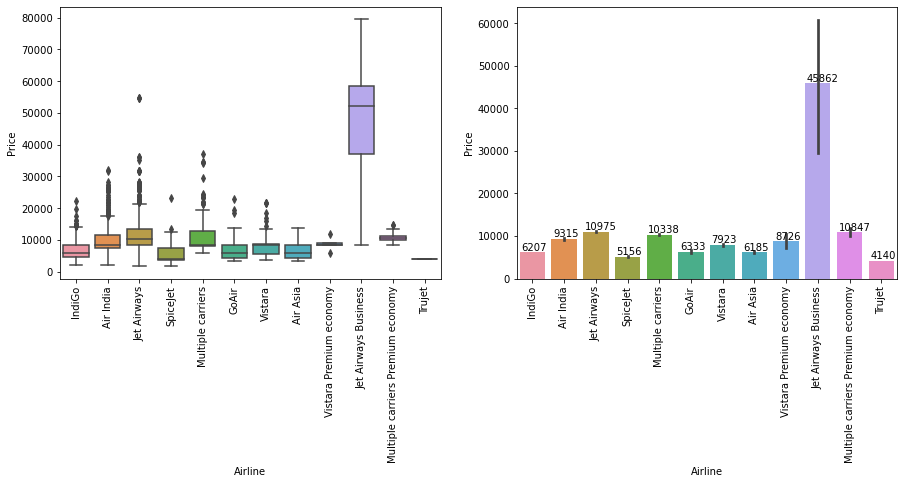

In [25]:
# Comparative analysis with attribute Price
#Bivariate analysis

#Comparative analysis of Price with Airlines
print('\nComparative analysis of Price with Airlines--->\n')
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(x='Airline',y='Price',data=data)
plt.xticks(rotation=90)

plt.subplot(122)
ax=sns.barplot(x='Airline',y='Price',data=data)
for j in ax.patches:
    ax.annotate(int(j.get_height()),(j.get_x()+0.05,j.get_height()+5), va='bottom',color='black')
plt.xticks(rotation=90)

plt.show()


Comparative analysis of Price with Source--->



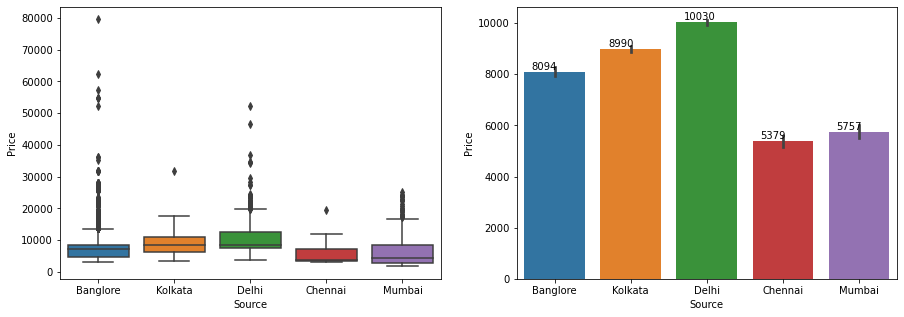

In [26]:
#Comparative analysis of Price with Source
print('\nComparative analysis of Price with Source--->\n')
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(x='Source',y='Price',data=data)

plt.subplot(122)
ax1=sns.barplot(x='Source',y='Price',data=data)
for j in ax1.patches:
    ax1.annotate(int(j.get_height()),(j.get_x()+0.1,j.get_height()+5), va='bottom',color='black')
plt.show()


Comparative analysis of Price with Destination--->



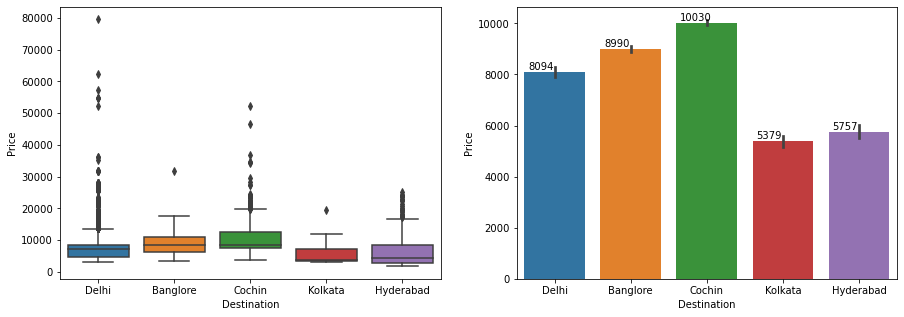

In [27]:
#Comparative analysis of Price with Source
print('\nComparative analysis of Price with Destination--->\n')

plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(x='Destination',y='Price',data=data)

plt.subplot(122)
ax2=sns.barplot(x='Destination',y='Price',data=data)
for j in ax2.patches:
    ax2.annotate(int(j.get_height()),(j.get_x()+0.05,j.get_height()+5), va='bottom',color='black')
plt.show()


Comparative analysis of Price with Total_Stops--->



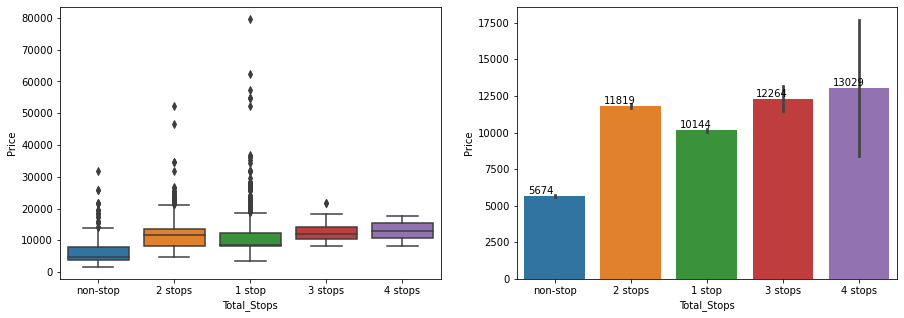

In [28]:
#Comparative analysis of Price with Source
print('\nComparative analysis of Price with Total_Stops--->\n')

plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(x='Total_Stops',y='Price',data=data)

plt.subplot(122)
ax3=sns.barplot(x='Total_Stops',y='Price',data=data)
for j in ax3.patches:
    ax3.annotate(int(j.get_height()),(j.get_x()+0.05,j.get_height()+5), va='bottom',color='black')
plt.show()


Comparative analysis of Price with date and Month--->



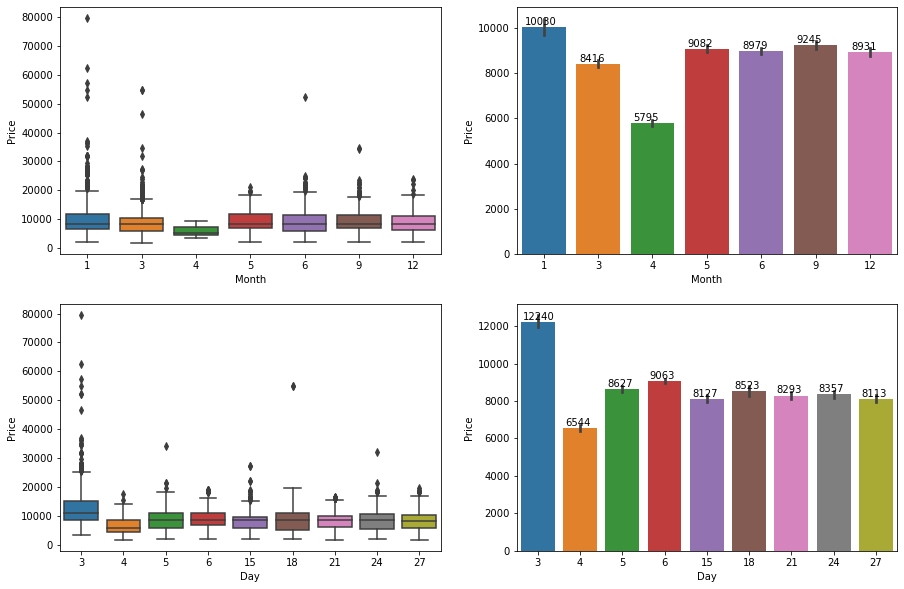

In [29]:
#Comparative analysis of Price with date and Month
print('\nComparative analysis of Price with date and Month--->\n')

plt.figure(figsize=(15,10))

plt.subplot(221)
sns.boxplot(x='Month',y='Price',data=data)

plt.subplot(222)
ax3=sns.barplot(x='Month',y='Price',data=data)
for j in ax3.patches:
    ax3.annotate(int(j.get_height()),(j.get_x()+0.05,j.get_height()+5), va='bottom',color='black')
    
plt.subplot(223)
sns.boxplot(x='Day',y='Price',data=data)

plt.subplot(224)
ax=sns.barplot(x='Day',y='Price',data=data)
for j in ax.patches:
    ax.annotate(int(j.get_height()),(j.get_x()+0.05,j.get_height()+5), va='bottom',color='black')    
    
plt.show()

In [30]:
## Checking for datatypes
data.dtypes

Airline             object
Source              object
Destination         object
Route               object
Duration             int64
Total_Stops         object
Additional_Info     object
Price              float64
root                object
Month                int64
Day                  int64
Arrival_Hour         int64
Arrival_min          int64
Dep_Hour             int64
Dep_min              int64
dtype: object

In [31]:
#importing label encoder
from sklearn.preprocessing import LabelEncoder

#applying label encoding to convert object type data to int type.
LE=LabelEncoder()
cols=['Airline','Source','Destination','Route','Total_Stops','Additional_Info']
for i in cols:
    data[i]=LE.fit_transform(data[i])

In [32]:
## Checking for data types after applying encoding
print('Data types after applying label encoding to object type data--->')
data.dtypes

Data types after applying label encoding to object type data--->


Airline              int32
Source               int32
Destination          int32
Route                int32
Duration             int64
Total_Stops          int32
Additional_Info      int32
Price              float64
root                object
Month                int64
Day                  int64
Arrival_Hour         int64
Arrival_min          int64
Dep_Hour             int64
Dep_min              int64
dtype: object

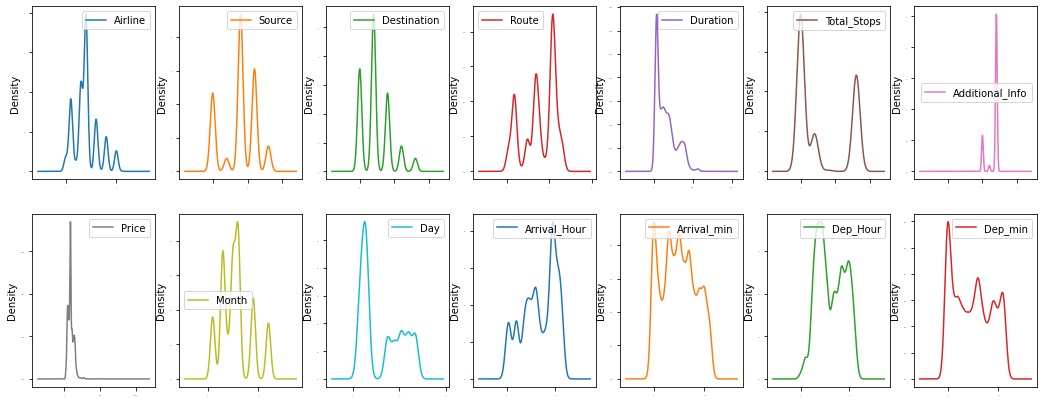

In [33]:
# Density visualisation for all attributes

data.plot(kind='density',layout=(2,7),sharex=False,sharey=False,subplots=True,grid=False,fontsize=1,figsize=(18,7))
plt.show()

In [34]:
##Checking for correlation of output variable with other attributes:
corr_matrix=data.corr()

<AxesSubplot:>

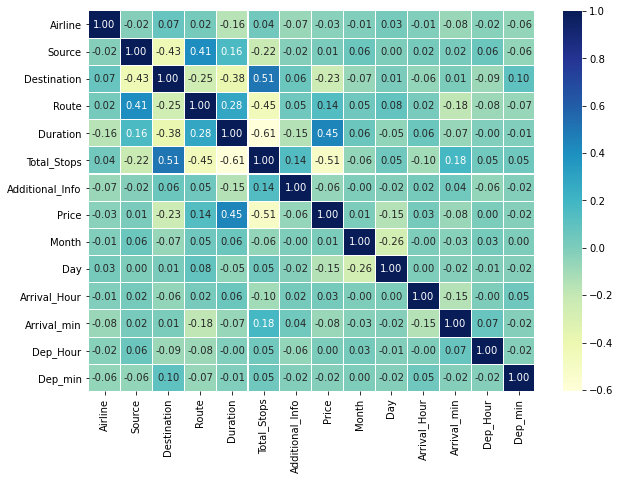

In [35]:
#Graphical Visualization of correlation 
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix,annot=True,linecolor='white',fmt='.2f',linewidths=0.1,cmap="YlGnBu")

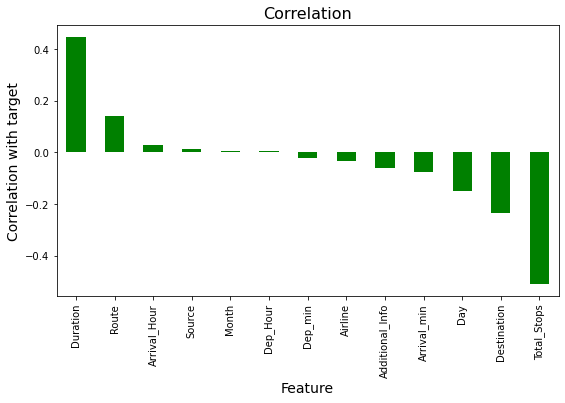

In [36]:
plt.figure(figsize=(9,5))
z=corr_matrix['Price'].sort_values(ascending=False)
z.drop(['Price']).plot(kind='bar',color='g')

plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with target',fontsize=14)
plt.title('Correlation',fontsize=16)
plt.show()

In [37]:
#Statistical Summary
data.describe()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Month,Day,Arrival_Hour,Arrival_min,Dep_Hour,Dep_min
count,13106.000000,13106.000000,13106.000000,13106.000000,13106.000000,13106.000000,13106.000000,13106.000000,13106.000000,13106.000000,13106.000000,13106.000000,13106.000000,13106.000000
mean,3.990462,1.955974,1.175034,76.975660,631.094537,1.454906,6.594079,8894.980162,5.548604,12.506638,13.431558,24.690218,12.504502,24.506714
std,2.374284,1.186134,1.016028,38.226042,500.768713,1.817165,0.823746,4140.224655,3.004048,8.750045,6.889110,16.614539,5.716715,18.872523
min,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,49.000000,170.000000,0.000000,7.000000,6103.250000,3.000000,5.000000,8.000000,10.000000,8.000000,5.000000
50%,4.000000,2.000000,1.000000,76.000000,505.000000,0.000000,7.000000,8372.000000,5.000000,6.000000,14.000000,25.000000,11.000000,25.000000
75%,4.000000,3.000000,2.000000,108.000000,910.000000,4.000000,7.000000,10953.000000,6.000000,21.000000,19.000000,35.000000,18.000000,40.000000
max,11.000000,4.000000,4.000000,131.000000,2860.000000,4.000000,8.000000,79512.000000,12.000000,27.000000,23.000000,55.000000,23.000000,55.000000


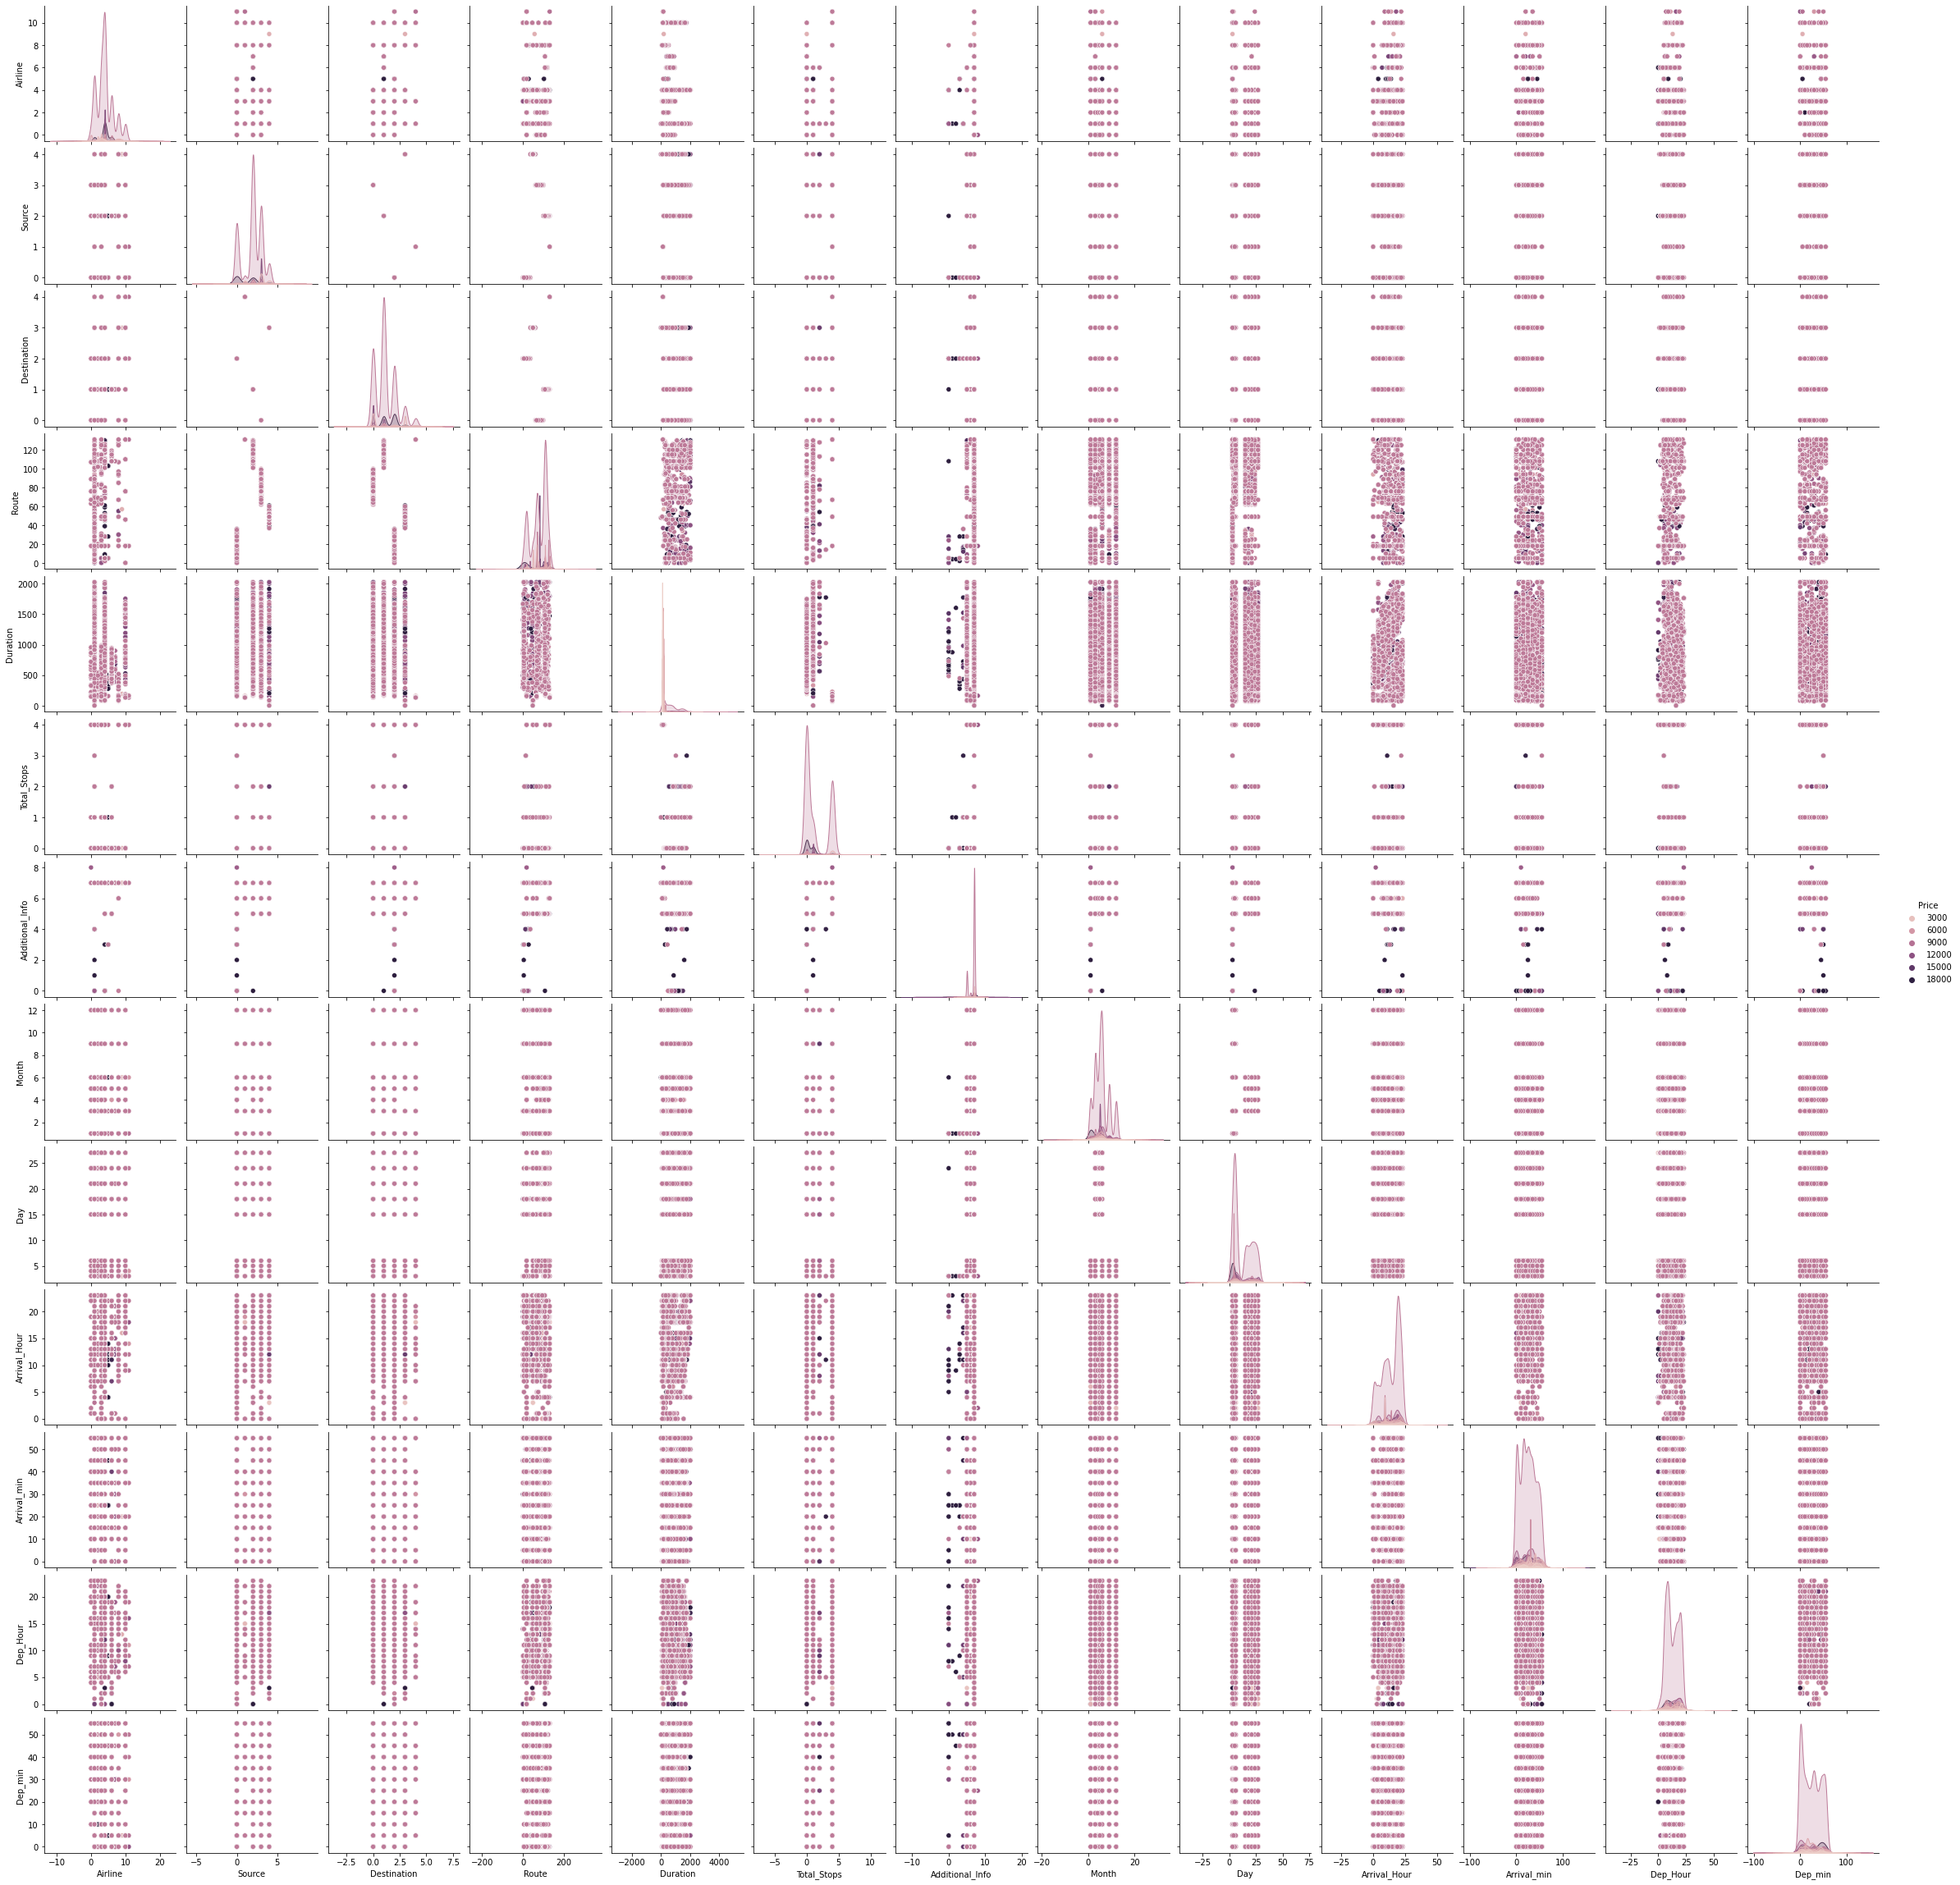

In [62]:
sns.pairplot(data,hue='Price')

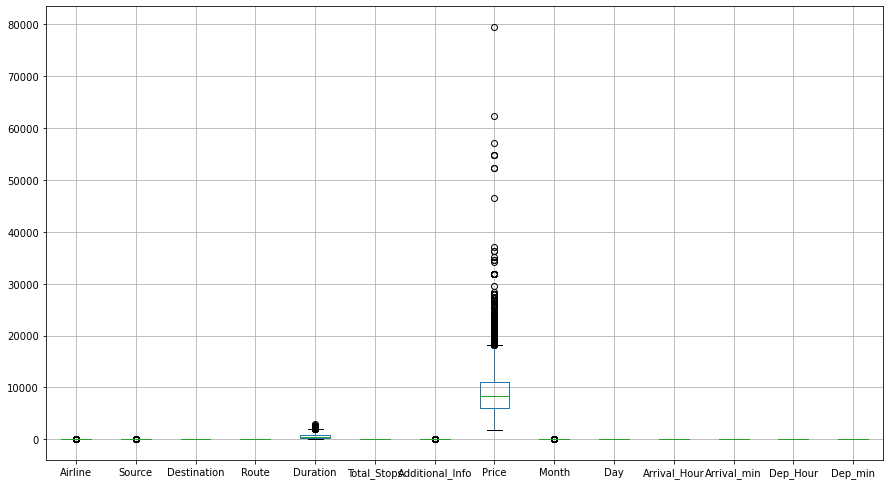

In [38]:
###checking for outliers

data.boxplot(figsize=[15,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [39]:
## Removing outliers
#Price has most of the outliers

from numpy import percentile
data_new=data
data_new.shape
att_=att_ = ['Price','Duration']
array=[None]*len(att_)
for x,i in enumerate(att_):
    q25,q75=percentile(data[i],25),percentile(data[i],75)
    iqr=q75-q25
    cut_off=iqr*1.5
    lower,upper=q25-cut_off,q75+cut_off
    array[x]=[i,lower,upper]
    data_new[i]=data_new[i].apply(lambda x: lower if x<lower else (upper if x>upper else x))

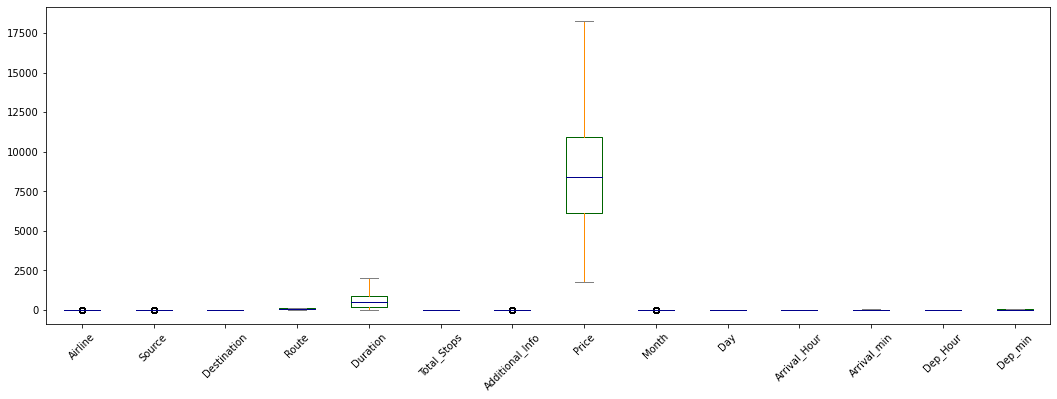

In [40]:
#Checking for Outliers after removing outliers:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
data_new.plot(kind='box', color=color,figsize=(18,7))
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=45)
plt.show()

In [41]:
data_new.skew()

Airline            0.714609
Source            -0.420957
Destination        0.826726
Route             -0.504840
Duration           0.843426
Total_Stops        0.627541
Additional_Info   -2.096172
Price              0.508954
Month              0.622267
Day                0.396994
Arrival_Hour      -0.392832
Arrival_min        0.110897
Dep_Hour           0.104517
Dep_min            0.162689
dtype: float64

In [42]:
## Skewness and Outliers removed succesfully.

In [43]:
## Splitting training and testing model

#Divide into test and train:
train = data_new.loc[data_new['root']=="train"]
test = data_new.loc[data_new['root']=="test"]

#Drop unnecessary columns:
test.drop(['Price','root'],axis=1,inplace=True)
train.drop(['root'],axis=1,inplace=True)

In [44]:
test.to_csv('test.csv')

In [45]:
#Splitting x and y variable
ds_x=train.drop(['Price'],axis=1) 
y=train['Price']

In [46]:
#lets bring all features to a common scale

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(ds_x)



x=pd.DataFrame(x,columns=ds_x.columns)
x.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Month,Day,Arrival_Hour,Arrival_min,Dep_Hour,Dep_min
0,0.272727,0.00,0.50,0.137405,0.081886,1.00,0.875,0.181818,0.875000,0.043478,0.181818,0.956522,0.363636
1,0.090909,0.75,0.00,0.664122,0.218362,0.25,0.875,0.000000,0.083333,0.565217,0.272727,0.217391,0.909091
2,0.363636,0.50,0.25,0.931298,0.563275,0.25,0.875,0.727273,0.125000,0.173913,0.454545,0.391304,0.454545
3,0.272727,0.75,0.00,0.725191,0.158809,0.00,0.875,1.000000,0.083333,1.000000,0.545455,0.782609,0.090909
4,0.272727,0.00,0.50,0.221374,0.138958,0.00,0.875,0.000000,0.000000,0.913043,0.636364,0.695652,0.909091


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [48]:
#Finding out best random state

from sklearn.linear_model import  LinearRegression
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is : ',maxAccu,'on random state :' ,maxRS)

Best Accuracy is :  0.5024138454568654 on random state : 97


In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=97)

In [50]:
print('Shape of train dataset :',train.shape)
print('Shape of test dataset :', test.shape)
print('Shape of input - training set :', x_train.shape)
print('Shape of output - training set :', y_train.shape)
print('Shape of input - testing set :', x_test.shape)
print('Shape of output - testing set :', y_test.shape)

Shape of train dataset : (10461, 14)
Shape of test dataset : (2645, 13)
Shape of input - training set : (7322, 13)
Shape of output - training set : (7322,)
Shape of input - testing set : (3139, 13)
Shape of output - testing set : (3139,)


In [51]:
models = [['DecisionTree :',DecisionTreeRegressor()],
               ['RandomForest :',RandomForestRegressor()],
               ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
               ['SVM :', SVR()],
               ['AdaBoostClassifier :', AdaBoostRegressor()],
               ['GradientBoostingRegressor: ', GradientBoostingRegressor()],
               ['Xgboost: ', XGBRegressor()],
               ['Lasso: ', Lasso()],
               ['Ridge: ', Ridge(random_state=6)],
               ['BayesianRidge: ', BayesianRidge()],
               ['ElasticNet: ', ElasticNet()],
               ['HuberRegressor: ', HuberRegressor()]]

In [52]:
print("Mean Square Errors---->")
print('\n')

for name,model in models:
    model = model
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

Mean Square Errors---->


DecisionTree : 1331.6989551097722
RandomForest : 1077.575407769581
KNeighbours : 2034.0334177946095
SVM : 3885.0936039090357
AdaBoostClassifier : 2396.67676495559
GradientBoostingRegressor:  1565.5651981867943
Xgboost:  1012.2788335138574
Lasso:  2871.1260167638748
Ridge:  2871.1358564788147
BayesianRidge:  2871.288363264149
ElasticNet:  3509.158655227133
HuberRegressor:  2878.362045982037


In [53]:
print("r2 Square/Accuracy Score----->")
print('\n')


for name,model in models:
    model = model
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(name, (r2_score(y_test, predictions))*100)

r2 Square/Accuracy Score----->


DecisionTree : 88.96011778247232
RandomForest : 92.92854145071519
KNeighbours : 75.02443445272945
SVM : 8.882428324505131
AdaBoostClassifier : 64.0376261414569
GradientBoostingRegressor:  85.2148919689642
Xgboost:  93.81414870604016
Lasso:  50.23733017821217
Ridge:  50.236989091598836
BayesianRidge:  50.23170240454525
ElasticNet:  25.6629758797015
HuberRegressor:  49.986182798160236


In [54]:
print('Cross_val_scores:')
print('\n')

names=[]
predictions=[]


for name,model in models:
    result=cross_val_score(model,x,y,cv=5,scoring='r2')
    predictions.append(result)
    names.append(name)
    result="%s : %f (%f)"%(name,result.mean(),result.std())
    print(result)

Cross_val_scores:


DecisionTree : : 0.878524 (0.012478)
RandomForest : : 0.925258 (0.004805)
KNeighbours : : 0.741904 (0.009910)
SVM : : 0.083779 (0.011784)
AdaBoostClassifier : : 0.631900 (0.004853)
GradientBoostingRegressor:  : 0.847773 (0.007213)
Xgboost:  : 0.934753 (0.006691)
Lasso:  : 0.476820 (0.016346)
Ridge:  : 0.476789 (0.016293)
BayesianRidge:  : 0.476789 (0.016289)
ElasticNet:  : 0.247901 (0.002658)
HuberRegressor:  : 0.470120 (0.017157)


In [55]:
### Performing Hyper parameter tuning to increase model performance of XGBoostregressor.

            
param_tuning = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
             }
#Create new XGB object
XG_2 = XGBRegressor()

#Use GridsearchCV
GCV = GridSearchCV(estimator = XG_2,param_grid = param_tuning,cv = 5,n_jobs = -1,verbose = 1)

#Fit the model
best_model = GCV.fit(x,y)

#checking for best parameters
GCV.best_params_

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


{'colsample_bytree': 0.8,
 'gamma': 0.5,
 'max_depth': 5,
 'min_child_weight': 5,
 'subsample': 1.0}

In [56]:

#Creating Final Model after hyperparameter tuning for XGBoostregressor.

f_mod= XGBRegressor(colsample_bytree = 0.8,
                    max_depth = 5,
                    min_child_weight = 5,
                    subsample = 1.0,
                    gamma = 0.5)


f_mod.fit(x,y)

y_pred = f_mod.predict(x_test)

print('root mean squared error for XGBRegressor:',np.sqrt(mean_squared_error(y_test,y_pred)))

print('Model accuracy forXGBRegressor: ',r2_score(y_test, y_pred))

root mean squared error for XGBRegressor: 869.543137340736
Model accuracy forXGBRegressor:  0.9543562385096981


In [ ]:
# Model was underfitting which was resolved using hyper parameter tuning.

### After hyper parameter tuning, model accuracy is 95.43%

In [58]:
from joblib import dump, load
dump(f_mod, 'flight_price_pred_xgb.joblib') 

['flight_price_pred_xgb.joblib']

In [59]:
#Creating a csv file foe deployment to consumer.

In [61]:
submission=pd.read_csv('test.csv')
model=XGBRegressor()
model.fit(x,y)
prediction=model.predict(test)
submission['Price']=prediction
submission['Price']=submission['Price'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('submission_flight_price_pred.csv',index=False)